## 1.

*Recogiendo los datos de coronavirus de la página https://ourworldindata.org/coronavirus-source-data* 

A partir de la letra de tu DNI, elige al país que empieza por dicha letra que más fallecidos tenga. Si el país elegido no está entre el top 20 de fallecidos, elige como país España.

En este caso, utilizaremos las columnas:

- Nuevos casos
- Nuevos fallecidos
- Población
- Fallecidos totales
- Casos totales

La fecha debe estar en el índice.

1. Representa todas las columnas en un gráfica con diferentes magnitudes en el eje y para su correcta visualización.

2. Elimina la columna "Población".

3. Entrena los algoritmos de regresión que hemos visto hasta ahora para predecir dos columnas por separado: Nuevos casos y Nuevos fallecidos. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento. ¿Qué error se comete? ¿crees que los algoritmos de ML vistos hasta ahora son buenos para realizar un forecast de una serie temporal viendo los resultados?

4. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones = 23 y n_repeats = 7 para este ejercicio y solo para la columna "nuevos casos".

In [25]:
import pandas as pd
df = pd.read_csv("../data/owid-covid-data.csv")
dfT = df[(df['location'] >= 'T')&(df['location'] <= 'U')]
dfT.groupby('location').sum('new_deaths').sort_values('new_deaths', ascending=False)  # se elige Turquía como país de análisis.

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
location,,,,,,,,,,,,,,,,,,,,,
Turkey,735735455.0,4547074.0,4530449.282,7906148.0,49185.0,49002.003,8723542.735,53914.209,53717.089,93742.431,...,93.4,79990.095,5664.71,6584.7,19193.7,0.000,1312.27,36281.23,382.940,0.00
Tunisia,52752838.0,382950.0,376649.851,1794988.0,14038.0,13801.161,4463536.943,32402.280,31869.193,151878.009,...,948.0,151201.734,4038.48,521.4,31189.2,37297.638,1090.20,36355.80,350.760,724.61
Thailand,11247766.0,218127.0,208167.150,72289.0,1629.0,1549.447,161142.828,3125.029,2982.333,1035.670,...,53.4,58665.774,3759.36,1014.6,20719.2,48417.780,1121.40,41198.10,414.918,90.96
Trinidad and Tobago,2723769.0,30619.0,29878.291,51878.0,737.0,705.600,1946256.886,21878.671,21349.391,37069.144,...,0.0,106008.688,5090.08,0.0,0.0,41501.552,1392.00,34108.64,369.344,0.00
Taiwan,598049.0,14004.0,13570.584,11056.0,549.0,498.869,25110.397,588.007,569.807,464.253,...,0.0,54265.554,0.00,0.0,0.0,0.000,0.00,42000.12,0.000,10.29
Togo,1990212.0,13721.0,13680.719,26218.0,128.0,126.894,240400.448,1657.383,1652.520,3166.900,...,23320.8,132735.642,2915.10,426.6,6730.8,4965.150,331.80,28932.96,244.110,0.00
Tajikistan,4281018.0,13308.0,13241.724,31458.0,90.0,89.042,448854.895,1395.318,1388.367,3298.255,...,2001.6,178350.066,2964.87,0.0,0.0,30317.568,2001.60,29648.70,278.556,0.00
Tanzania,216279.0,509.0,506.571,8873.0,21.0,21.000,3620.663,8.519,8.483,148.722,...,22684.2,100387.056,2656.50,1524.6,12335.4,22154.286,323.40,30242.52,244.398,0.00
Timor,358452.0,8707.0,8531.022,687.0,19.0,19.009,271875.418,6603.994,6470.507,521.064,...,13816.8,152917.776,3128.16,2872.8,35613.6,12849.168,2690.40,31692.00,276.336,0.00


In [26]:
#Nuevos casos, Nuevos fallecidos, Población, Fallecidos totales, Casos totales

dfTurk= df[df['location'] == 'Turkey']
dfTurk = dfTurk[['date','new_cases','new_deaths','population','total_deaths','total_cases']]
#dfTurk['date'] = dfTurk['date'].apply(lambda x: int(x.replace('-', '')))
dfTurk.set_index('date', inplace=True)
dfTurk.fillna(0, inplace=True)
dfTurk

,new_cases,new_deaths,population,total_deaths,total_cases
date,,,,,
2020-03-11,1.0,0.0,84339067.0,0.0,1.0
2020-03-12,0.0,0.0,84339067.0,0.0,1.0
2020-03-13,4.0,0.0,84339067.0,0.0,5.0
2020-03-14,0.0,0.0,84339067.0,0.0,5.0
2020-03-15,1.0,0.0,84339067.0,0.0,6.0
...,...,...,...,...,...
2021-06-16,6221.0,71.0,84339067.0,48950.0,5348249.0
2021-06-17,5904.0,62.0,84339067.0,49012.0,5354153.0
2021-06-18,5575.0,59.0,84339067.0,49071.0,5359728.0


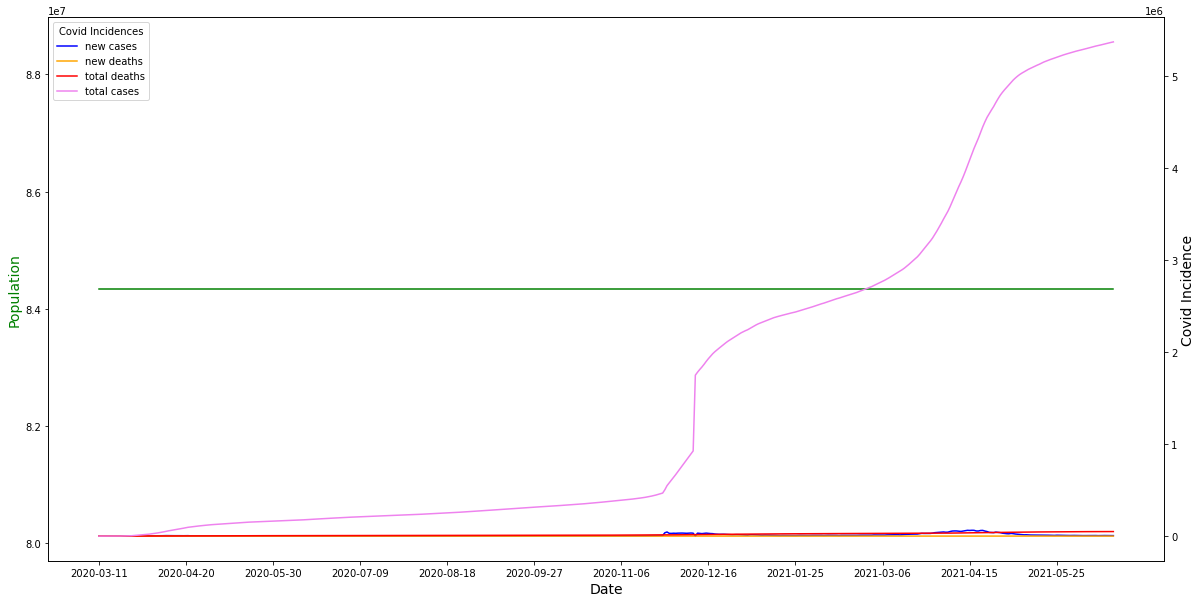

In [27]:
# 1.-Representa todas las columnas en un gráfica con diferentes magnitudes en el eje y para su correcta visualización.
import matplotlib.pyplot as plt 

# se crea una gráfica grande para una buena visualización
fig,ax = plt.subplots(figsize=(20, 10))

# se crea el primer objeto de visualización para el primer eje y
ax.plot(dfTurk.index, dfTurk.population, color="green")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Population",color="green",fontsize=14)

# se crea el segundo eje-Y y se dibuja la descripción del eje
ax2=ax.twinx()
ax2.set_ylabel("Covid Incidence",color="black",fontsize=14)

# se añaden los valores a la gráfica en el eje y
ax2.plot(dfTurk.index, dfTurk["new_cases"],color="blue", label='new cases')
ax2.plot(dfTurk.index, dfTurk["new_deaths"],color="orange", label='new deaths')
ax2.plot(dfTurk.index, dfTurk["total_deaths"],color="red", label='total deaths')
ax2.plot(dfTurk.index, dfTurk["total_cases"],color="violet", label='total cases')

# se pdibuja el conjunto
plt.legend(loc='upper left', title='Covid Incidences')
ticks = ax.get_xticks()[::40]
ax.set_xticks(ticks)
plt.show()

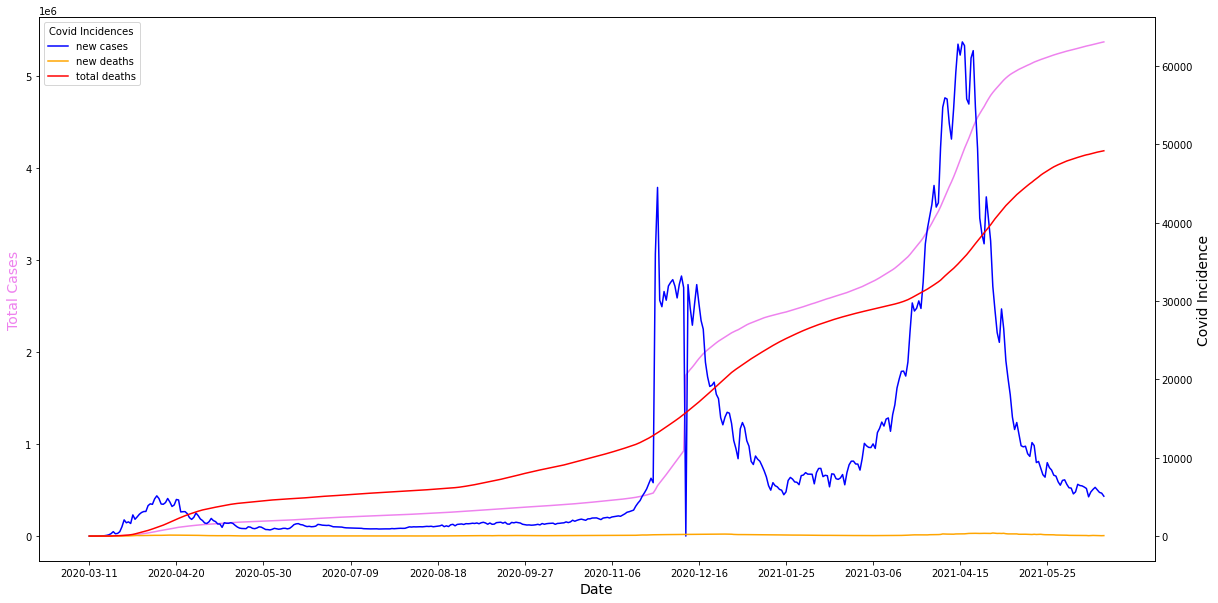

In [28]:
# 2.-Elimina la columna "Población".
dfTurk.drop(columns='population', inplace=True)

# se crea una gráfica grande para una buena visualización
fig,ax = plt.subplots(figsize=(20, 10))

# se crea el primer objeto de visualización para el primer eje y
ax.plot(dfTurk.index, dfTurk.total_cases, color="violet")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Total Cases",color="violet",fontsize=14)

# se crea el segundo eje-Y y se dibuja la descripción del eje
ax2=ax.twinx()
ax2.set_ylabel("Covid Incidence",color="black",fontsize=14)

# se añaden los valores a la gráfica en el eje y
ax2.plot(dfTurk.index, dfTurk["new_cases"],color="blue", label='new cases')
ax2.plot(dfTurk.index, dfTurk["new_deaths"],color="orange", label='new deaths')
ax2.plot(dfTurk.index, dfTurk["total_deaths"],color="red", label='total deaths')

# se pdibuja el conjunto
plt.legend(loc='upper left', title='Covid Incidences')
ticks = ax.get_xticks()[::40]
ax.set_xticks(ticks)
plt.show()

3.- Entrena los algoritmos de regresión que hemos visto hasta ahora para predecir dos columnas por separado: Nuevos casos y Nuevos fallecidos. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento. ¿Qué error se comete? ¿crees que los algoritmos de ML vistos hasta ahora son buenos para realizar un forecast de una serie temporal viendo los resultados?

-> Se comenten errores en los conjuntos de validación, los algoritmos de ML vistos no sirven para predecir series temporales ya que hay demasiados errores de overfitting.

4.- Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones = 23 y n_repeats = 7 para este ejercicio y solo para la columna "nuevos casos".

-> hay sobreaprendizaje ya que en todas las gráficas representadas el error de validación oscila sobre el de entrenamiento, y en ninguna es estable. 

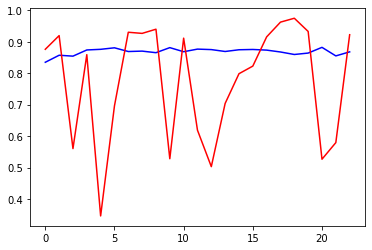

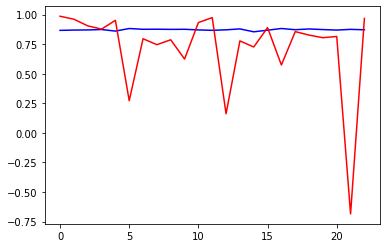

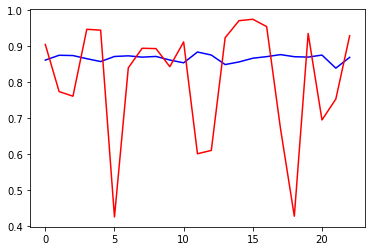

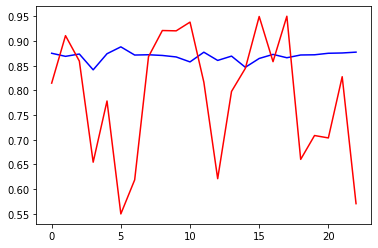

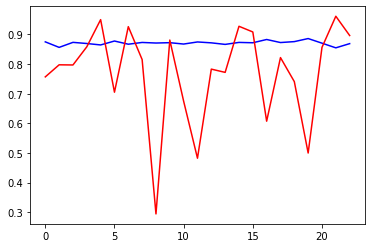

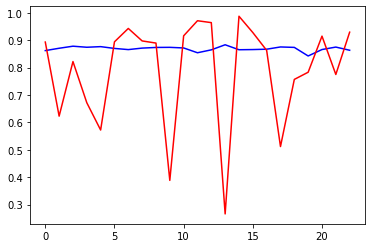

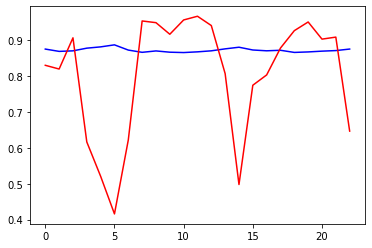

In [23]:
# entrenamiento del modelo 
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RepeatedKFold 

# variables de control
rd_st = 42 #random_state = 42
dg = 7 # degree es igual a 7
nsp = 23 # n_splits = 23
nrp = 7 # n_repeats = 7


X = np.array(dfTurk.drop(columns=['new_cases']))
y = np.array(dfTurk['new_cases'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rd_st)

rkf = RepeatedKFold(n_splits=nsp, n_repeats=nrp, random_state=rd_st) # n_repeats es el número de épocas
val_score = []
train_score = []
dict_result = {}
epoc= 0

polinominal_model = PolynomialFeatures(dg) 
X_train = polinominal_model.fit_transform(X_train,y_train)
model = LinearRegression()

for i, (train, val) in enumerate(rkf.split(X_train)):
    # se entrena el modelo para este tandem de train/validation
    model.fit(X_train[train], y_train[train]) # se cogen los índices que se generan en kfold_split del for

    score_val = model.score(X_train[val], y_train[val])
    val_score.append(score_val)
    score_train = model.score(X_train[train], y_train[train])
    train_score.append(score_train)

    if i%nsp == nsp -1:
        epoc += 1
        dict_result[epoc] = [train_score, val_score]
        plt.plot(train_score, color="b")
        plt.plot(val_score, color="r")
        plt.show()
        val_score = []
        train_score = []

In [20]:
# pruebas para el SVR
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

# regeneración de los valores de X e y (convertidos después del poly)
X = np.array(dfTurk.drop(columns=['new_cases']))
y = np.array(dfTurk['new_cases'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rd_st)

In [7]:


# config de los parámetros  
parameters = {
    'kernel': ['poly'], #, , 'rbf', 'sigmoid'
    'C':[10],
    'degree': [8,9],
    'coef0': [ 11,12]
    }

svr = svm.SVR()

clf = GridSearchCV(estimator=svr, param_grid=parameters, verbose=10, cv=2)
clf.fit(X_train, y_train)

print("clf.best_stimator_", clf.best_estimator_)
print("clf.best_params_", clf.best_params_)
# Mean cross-validated score of the best_estimator
print("clf.best_score", clf.best_score_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2; 1/4] START C=10, coef0=11, degree=8, kernel=poly.......................
[CV 1/2; 1/4] END C=10, coef0=11, degree=8, kernel=poly;, score=0.876 total time=  22.4s
[CV 2/2; 1/4] START C=10, coef0=11, degree=8, kernel=poly.......................
[CV 2/2; 1/4] END C=10, coef0=11, degree=8, kernel=poly;, score=0.882 total time=   9.2s
[CV 1/2; 2/4] START C=10, coef0=11, degree=9, kernel=poly.......................
[CV 1/2; 2/4] END C=10, coef0=11, degree=9, kernel=poly;, score=-11.263 total time=  19.1s
[CV 2/2; 2/4] START C=10, coef0=11, degree=9, kernel=poly.......................
[CV 2/2; 2/4] END C=10, coef0=11, degree=9, kernel=poly;, score=0.211 total time=  22.5s
[CV 1/2; 3/4] START C=10, coef0=12, degree=8, kernel=poly.......................
[CV 1/2; 3/4] END C=10, coef0=12, degree=8, kernel=poly;, score=0.903 total time=  33.3s
[CV 2/2; 3/4] START C=10, coef0=12, degree=8, kernel=poly.......................
[CV 2/2;

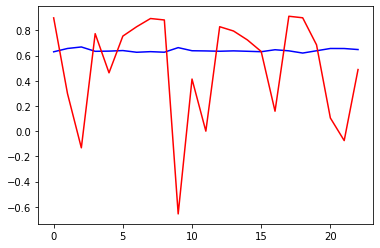

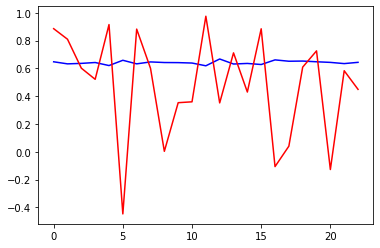

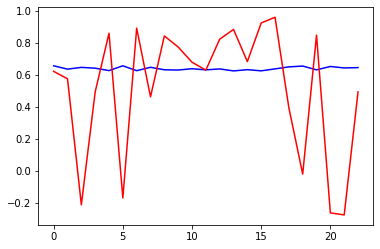

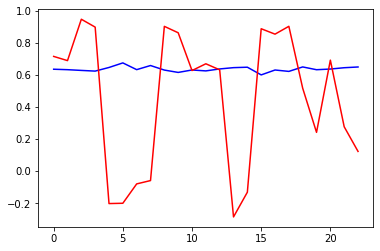

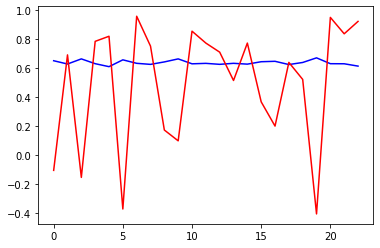

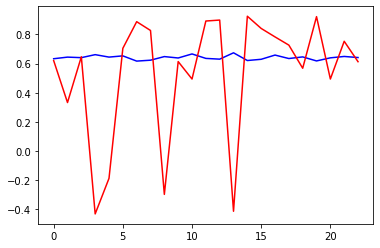

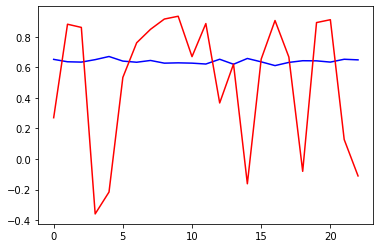

In [10]:
model = SVR(kernel='poly', C=10, degree=7, coef0=8)

for i, (train, val) in enumerate(rkf.split(X_train)):
    # se entrena el modelo para este tandem de train/validation
    model.fit(X_train[train], y_train[train]) # se cogen los índices que se generan en kfold_split del for

    score_val = model.score(X_train[val], y_train[val])
    val_score.append(score_val)
    score_train = model.score(X_train[train], y_train[train])
    train_score.append(score_train)

    if i%nsp == nsp -1:
        epoc += 1
        dict_result[epoc] = [train_score, val_score]
        plt.plot(train_score, color="b")
        plt.plot(val_score, color="r")
        plt.show()
        val_score = []
        train_score = []

In [8]:
# pruebas para el RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor


rfr = RandomForestRegressor()
# config de los parámetros  
parameters = {
    'n_estimators': [100,500,1000], #, , 'rbf', 'sigmoid'
    'oob_score':[True, False],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2,4,6,8,10,15,20], 
    'min_samples_leaf':[2,3,4,5]
    }

clf = GridSearchCV(estimator=rfr, param_grid=parameters, verbose=10, cv=2)
clf.fit(X_train, y_train)

print("clf.best_stimator_", clf.best_estimator_)
print("clf.best_params_", clf.best_params_)
# Mean cross-validated score of the best_estimator
print("clf.best_score", clf.best_score_)

Fitting 2 folds for each of 1008 candidates, totalling 2016 fits
[CV 1/2; 1/1008] START bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=True
[CV 1/2; 1/1008] END bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=True;, score=0.916 total time=   0.0s
[CV 2/2; 1/1008] START bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=True
[CV 2/2; 1/1008] END bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=True;, score=0.961 total time=   0.0s
[CV 1/2; 2/1008] START bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=False
[CV 1/2; 2/1008] END bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, oob_score=False;, score=0.928 total time=   0.0s
[CV 2/2; 2/1008] START bootstrap=True, max_featu

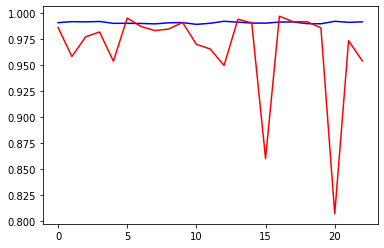

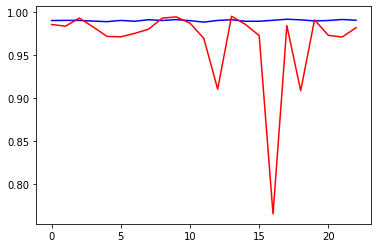

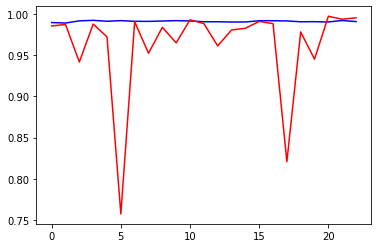

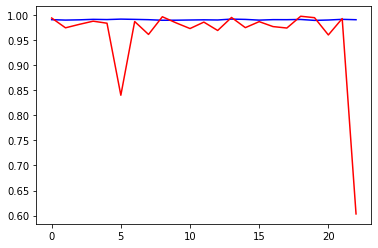

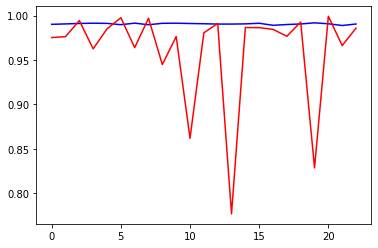

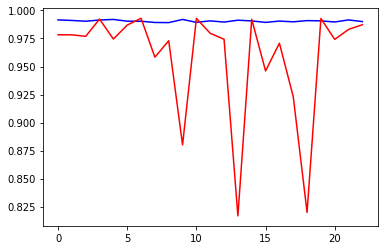

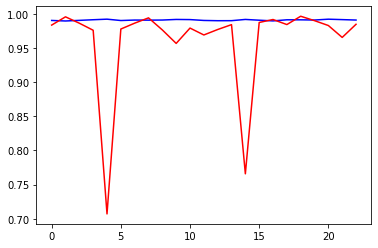

In [21]:
model = RandomForestRegressor(n_estimators=200,oob_score=False,bootstrap=True,max_features='log2',min_samples_split=2,min_samples_leaf=2)

for i, (train, val) in enumerate(rkf.split(X_train)):
    # se entrena el modelo para este tandem de train/validation
    model.fit(X_train[train], y_train[train]) # se cogen los índices que se generan en kfold_split del for

    score_val = model.score(X_train[val], y_train[val])
    val_score.append(score_val)
    score_train = model.score(X_train[train], y_train[train])
    train_score.append(score_train)

    if i%nsp == nsp -1:
        epoc += 1
        dict_result[epoc] = [train_score, val_score]
        plt.plot(train_score, color="b")
        plt.plot(val_score, color="r")
        plt.show()
        val_score = []
        train_score = []

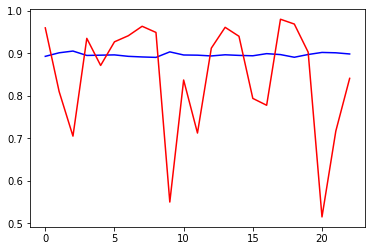

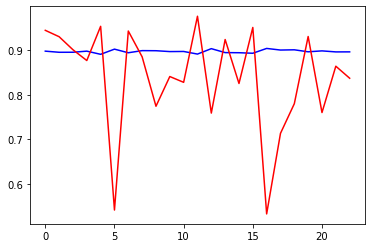

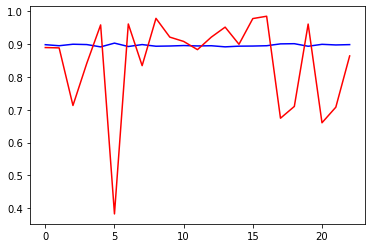

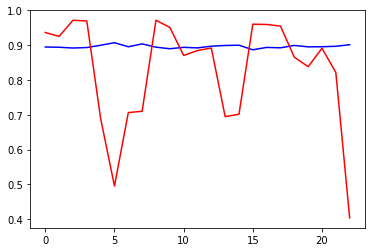

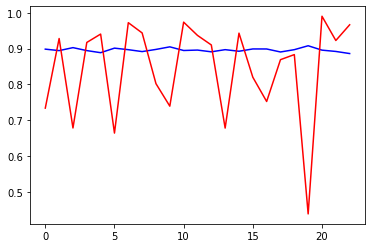

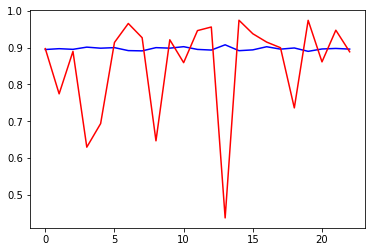

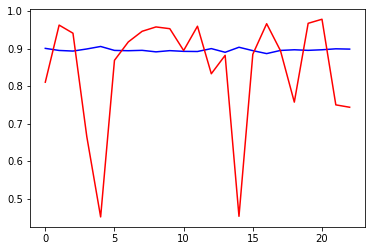

In [22]:
from sklearn.ensemble import VotingRegressor

modelSVR = SVR(kernel='poly', C=10, degree=7, coef0=8)
modelRFR = RandomForestRegressor(n_estimators=200,oob_score=False,bootstrap=True,max_features='log2',min_samples_split=2,min_samples_leaf=2)


estimators = [('SVR', modelSVR), ('rand_forest', modelRFR)]

model = VotingRegressor(estimators=estimators)

for i, (train, val) in enumerate(rkf.split(X_train)):
    # se entrena el modelo para este tandem de train/validation
    model.fit(X_train[train], y_train[train]) # se cogen los índices que se generan en kfold_split del for

    score_val = model.score(X_train[val], y_train[val])
    val_score.append(score_val)
    score_train = model.score(X_train[train], y_train[train])
    train_score.append(score_train)

    if i%nsp == nsp -1:
        epoc += 1
        dict_result[epoc] = [train_score, val_score]
        plt.plot(train_score, color="b")
        plt.plot(val_score, color="r")
        plt.show()
        val_score = []
        train_score = []